In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
con = sqlite3.connect('./final.sqlite')
final = pd.read_sql_query(""" SELECT * FROM Reviews""", con) 


In [3]:
final = final.sample(n = 8000)

In [4]:
final.shape

(8000, 12)

In [5]:
l = final['Score']
final = final.drop("Score", axis = 1)

In [6]:
final.shape

(8000, 11)

In [7]:
count_vect = CountVectorizer()
final_counts = count_vect.fit_transform(final['CleanedText'].values)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])


the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (8000, 11943)
the number of unique words  11943


In [8]:
from sklearn.preprocessing import StandardScaler
final_df = pd.DataFrame(final_counts.toarray())

In [9]:
standardized_data = StandardScaler(with_mean = False).fit_transform(final_df)


In [10]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2)
tsne_data = model.fit_transform(standardized_data)

In [11]:
tsne_data = np.vstack((tsne_data.T, l)).T

In [12]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

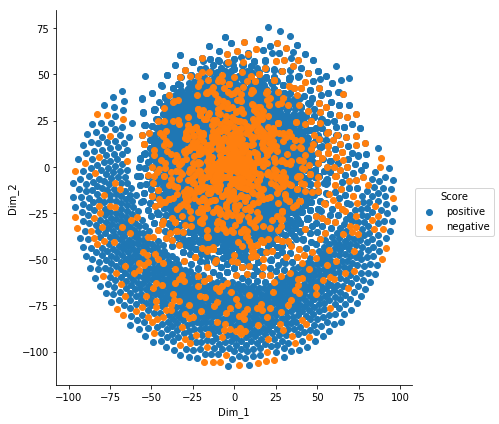

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.FacetGrid(tsne_df,hue = "Score",size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [16]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state = 0, perplexity = 70)
tsne_data = model.fit_transform(standardized_data)

In [17]:
tsne_data = np.vstack((tsne_data.T, l)).T

In [18]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

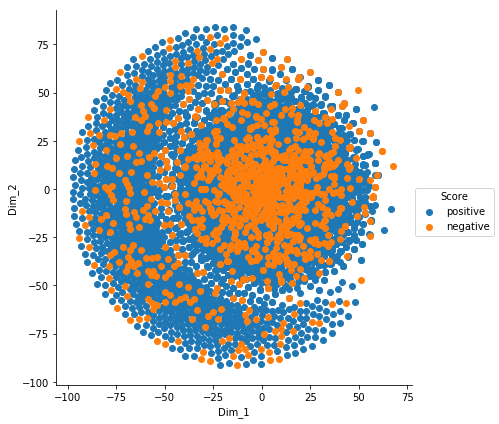

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.FacetGrid(tsne_df,hue = "Score",size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [20]:
model = TSNE(n_components=2, random_state = 0, perplexity = 20, n_iter = 5000)
tsne_data = model.fit_transform(standardized_data)

In [21]:
tsne_data = np.vstack((tsne_data.T, l)).T

In [22]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

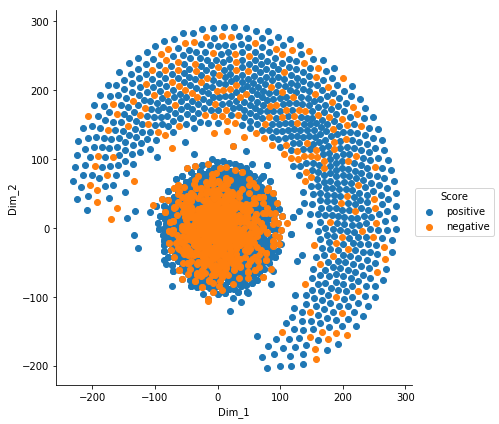

In [23]:
sn.FacetGrid(tsne_df,hue = "Score",size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [24]:
model = TSNE(n_components=2, random_state = 0, perplexity = 20, n_iter = 5000)
tsne_data = model.fit_transform(standardized_data)

In [25]:
tsne_data = np.vstack((tsne_data.T, l)).T

In [26]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

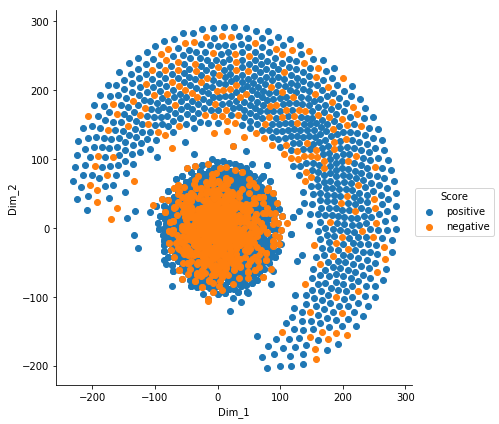

In [27]:
sn.FacetGrid(tsne_df,hue = "Score",size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()